- **interdisiplinary schools**
- **Fatemeh Jafari**

# **NIBABEL LIBRARY**

| Modality                               | What it Measures                                     | Example Uses                                                                    | Popular Python Tools/Libraries                                                                                |
| -------------------------------------- | ---------------------------------------------------- | ------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------- |
| **MRI (Magnetic Resonance Imaging)**   | Brain anatomy, structure, and physiology             | Structural T1-weighted images, diffusion imaging (DTI), fMRI for brain activity | NiBabel (file I/O), Nilearn (analysis & visualization), DIPY (diffusion imaging), Nipype (pipelines)          |
| **fMRI (Functional MRI)**              | Blood oxygen level changes reflecting brain activity | Task-based and resting-state brain function                                     | NiBabel, Nilearn (GLM, visualization), Nipype (preprocessing workflows like fMRIPrep), PyBIDS (data handling) |
| **DTI (Diffusion Tensor Imaging)**     | Direction of water diffusion, white matter tracts    | Mapping brain connectivity and fiber tracts                                     | DIPY (diffusion processing), NiBabel, Nipype                                                                  |
| **EEG (Electroencephalography)**       | Electrical activity of the brain                     | High temporal resolution brain activity, seizures                               | MNE-Python (EEG/MEG analysis), PyEEG                                                                          |
| **MEG (Magnetoencephalography)**       | Magnetic fields from neural electrical currents      | Brain function with millisecond resolution                                      | MNE-Python                                                                                                    |
| **PET (Positron Emission Tomography)** | Metabolic and molecular processes                    | Neurotransmitter activity, glucose metabolism                                   | NiBabel (some PET formats), Nilearn, Nipype (some pipelines)                                                  |
| **CT (Computed Tomography)**           | X-ray based anatomical images                        | Detecting hemorrhages or bone abnormalities                                     | NiBabel (basic support), SimpleITK (more general medical imaging), Nipype                                     |


# **What is NiBabel?**

NiBabel is a Python library used to access and manipulate neuroimaging file formats such as NIfTI (.nii/.nii.gz), Analyze, and even DICOM.

# **What does it do?**

 - > **Reads and writes neuroimaging data (e.g., NIfTI)**

 - > **Provides access to:**

       > Metadata (voxel size, orientation)

       > headers

       > Affine matrices (for spatial positioning)



| Functions         | Example                             |
| ---------------------- | ----------------------------------- |
| Load images            | nib.load('image.nii.gz')            |
| Access data            | img.get\_fdata() → NumPy array      |
| Access metadata/header | img.header                          |
| Access affine matrix   | img.affine                          |
| Save images            | nib.save(new\_img, 'output.nii.gz') |


In [12]:
# pip install NiBabel
import numpy as np
import nibabel as nib

In [13]:
img = nib.load(r"F:\neurotasks\interdisciplinary schools\2025-mentoring\python\sess4\flanker\sub-19\func\run-01\sub-19_task-flanker_run-1_bold.nii")


**Full get_fdata() loads everything into RAM**


In [ ]:
data = img.get_fdata()  

print(data.shape)      
 
print(data.dtype)       


(64, 64, 40, 146)
float64


In [ ]:
print(img.header.get_zooms())  # voxel size in mm


(np.float32(3.0), np.float32(3.0), np.float32(4.0), np.float32(2.0))


# **“You can open the MRI box, read its contents and metadata, and write a new one.”**

- **Understanding NIfTI Structure (More Than Just Loading)**

      > The "Neuroimaging Informatics Technology Initiative", commonly used to store brain imaging data obtained using Magnetic Resonance Imaging methods.

**What is a NIfTI file, technically?**

  > It’s composed of:

         > metadata

         > A header (containing metadata like voxel size, datatype, orientation…)

         > An image data block (3D or 4D array of voxel intensities)

         >An affine transformation matrix (for voxel-to-world coordinates)

# **what is Metadata?**

In neuroimaging, especially when working with tools like Nilearn, NiBabel, or BIDS datasets, metadata refers to:

  > **“Data about data”** — that is, information that describes the properties, context, or structure of the actual neuroimaging data.

| Metadata Type              | Description                                                                 | Example                                                       |
| -------------------------- | --------------------------------------------------------------------------- | ------------------------------------------------------------- |
| 🗂 File header info        | Info embedded in the image file itself (e.g., .nii, .nii.gz)                | Voxel size, image dimensions, TR (repetition time), data type |
| 🧑 Subject/session info    | Describes the participant or scan session                                   | Subject ID, age, sex, scan date, session number               |
| 🧪 Experimental conditions | Info about task events or stimuli shown                                     | Condition labels, stimulus onset times, durations             |
| ⏱ Scan acquisition params  | MRI scanner settings used for the image                                     | TR, TE (echo time), flip angle, field strength                |
| 📄 BIDS sidecar JSON files | JSON files accompanying NIfTI images (in BIDS format) that contain metadata | `sub-01_task-rest_bold.json` with TR, task name, slice timing |
| 📋 Derivatives metadata    | Info about preprocessing, smoothing, or statistical maps                    | Software used, smoothing kernel size, contrast definitions    |


---

## **What Is the “Header” in a NIfTI File?**

The NIfTI header is not the brain image itself. It is the metadata — the structured representation of the image’s context — that allows us to interpret the raw voxel data correctly.

* Data shape (e.g., 64×64×36×240)

* Voxel dimensions (pixdim)

* Repetition Time (TR)

* Data type (float32, int16)


---

## **Why It Matters?**

In practice, neuroimaging software like FSL, SPM, ANTs, FreeSurfer, and Nilearn all rely on the header to do things like:

* Reslice or resample images
* Register subject brains to a template
* Interpret the meaning of voxel coordinates
* Know whether the image has already been preprocessed


## **The Header**

| Role            | Meaning                                                                 |
| --------------- | ----------------------------------------------------------------------- |
| Ontological     | Encodes the identity, size, and scale of the image                      |
| Epistemological | Makes voxel data interpretable in space and time                        |
| Functional      | Enables interoperability between tools, registration, and visualization |






---

In [3]:
import nibabel as nib

print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  4  64  64  40 146   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 3. 3. 4. 2. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'FSL4.0')
aux_file        : np.bytes_(b'')
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -86.548195
qoffset_y       : -83.656624
qo

# **Affine Matrix in Neuroimaging**

> **What is the true nature and essence of the affine matrix?**

> **Why does it exist, and what fundamental role does it play in the meaning and function of brain imaging data?**

---

## **The Affine Matrix: More Than Numbers**

At first glance, an affine matrix is just a 4×4 numerical matrix. But it is much more:

* It is the **bridge** between two worlds:

  * The discrete **voxel space** (a grid of integers: i, j, k)
  * The continuous **real-world space** (millimeters, anatomical coordinates)

In [4]:
print(img.affine)

[[  3.           0.           0.         -86.54819489]
 [  0.           3.           0.         -83.65662384]
 [  0.           0.           4.         -78.72289276]
 [  0.           0.           0.           1.        ]]


# **coordinate frames**

 > **What are Coordinate Frames?**

A coordinate frame (or coordinate system) is a way to define how we measure positions in space. It sets:

 * An origin point (where coordinates start, usually 0,0,0)

 * Axes directions (which way X, Y, Z point)

 * Units of measurement (millimeters, meters, pixels, etc.)

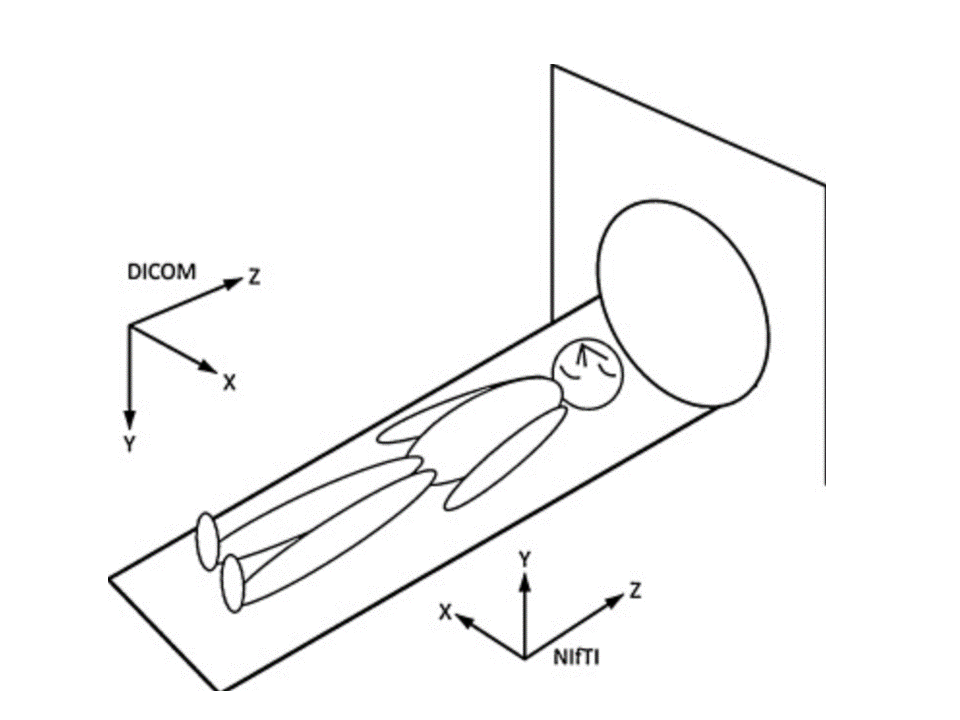

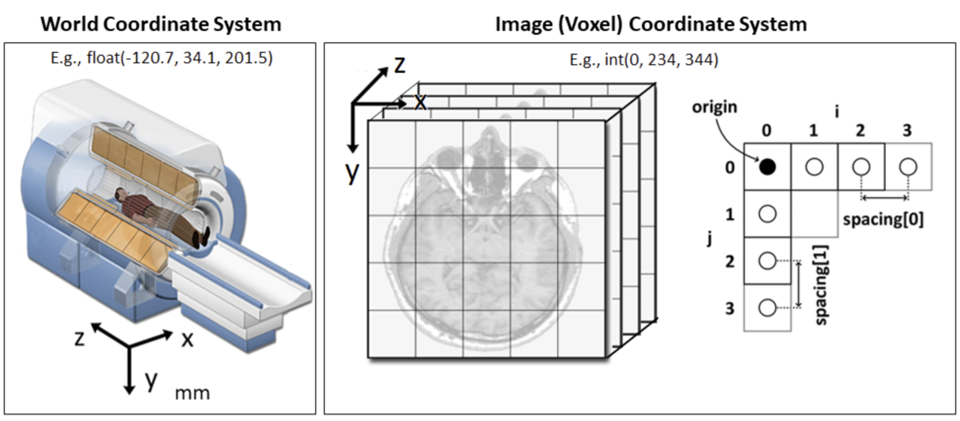

In [8]:
from IPython.display import Image, display
display(Image(filename=r'F:\neurotasks\interdisciplinary schools\2025-mentoring\updated contents-py\Presentation4\Slide3.PNG', width= 500)) 
display(Image(filename=r'F:\neurotasks\interdisciplinary schools\2025-mentoring\updated contents-py\Presentation4\Slide4.PNG', width= 1000))

RAS
R = right >> x
A =antetior >> y 
S = superior>> z

 > Why are coordinate frames important in neuroimaging?

Because brain images come from different scanners, sessions, or subjects, they often have different:

 * Origins

 * Orientations

 * Scales

     > To compare or combine images, scientists use coordinate frames to make sure positions correspond to the same physical location in the brain. 

---



## **Affine Matrix as a Spatial Map or “Coordinate Translator”**

Imagine:

* You have a 3D array of voxel intensities. Each voxel is addressed by an integer triplet `[i, j, k]`.
* But these indices tell you only about position in the *data file*, not in the physical brain.

The affine matrix **maps** these integer grid points to physical locations:

* It defines the **origin** of the image in physical space
* It defines the **direction** (orientation) of each axis (left-right, anterior-posterior, inferior-superior)
* It defines the **scale** — the physical size of each voxel (e.g., 1 mm³)

---



## **Affine Matrix**

| Aspect                | Explanation                                                                     |
| --------------------- | ------------------------------------------------------------------------------- |
| Nature                | A 4×4 spatial transformation matrix                                             |
| Role                  | Maps voxel indices → real-world physical brain coordinates                      |
| Function              | Defines origin, scale, orientation, and direction of data axes                  |
| Philosophical meaning | The “meaning-giver” of spatial context for otherwise abstract voxel data        |
| Analogy               | A “coordinate contract” that makes voxel data interpretable                     |
| Importance            | Essential for visualization, registration, and integration of neuroimaging data |

---

# **Coordinate Spaces:**

   * Voxel space vs. World space

Understanding the difference between voxel space and world space is essential for interpreting brain images accurately. Let’s break it down:

---

## **What is Voxel Space?**

 > **What is a voxel?**
A voxel is like a small 3D pixel in the brain scan. It has a position in the image;

For example:
This voxel is at position **(10, 20, 30)**
That means:

10 steps in the X direction **(left-right)**

20 steps in the Y direction **(front-back)**

30 steps in the Z direction **(up-down)**

But this is only a position in the image grid, not in real-world units.





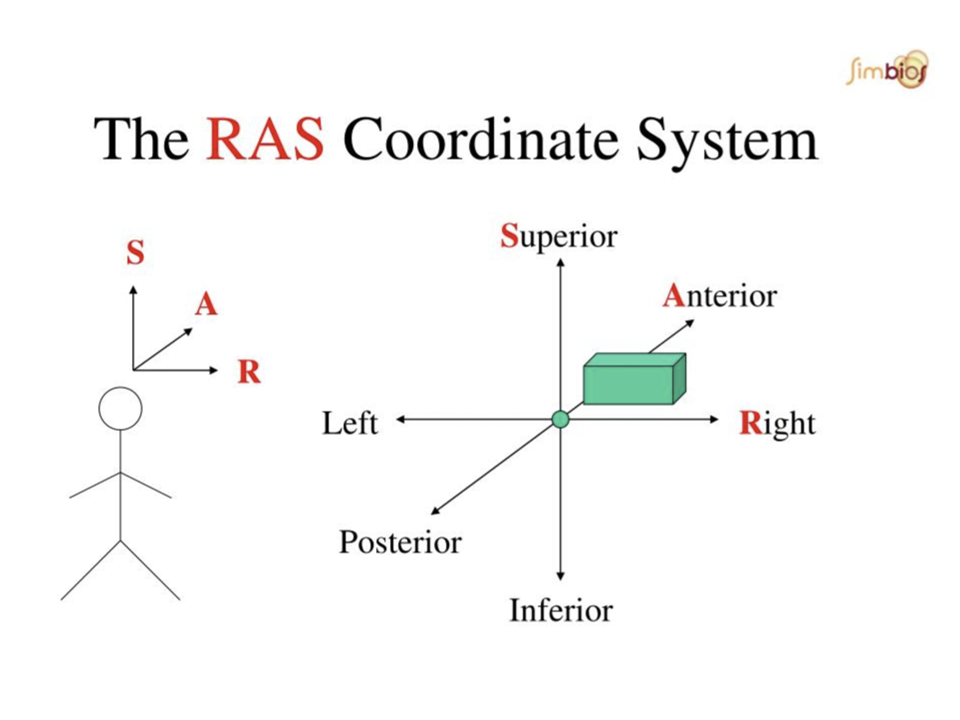

In [9]:
Image(filename=r'F:\neurotasks\interdisciplinary schools\2025-mentoring\updated contents-py\Presentation4\Slide2.PNG', width= 1000) 

In [5]:
[1,0,0]

[1, 0, 0]


## **What is World Space?** 

Scanner space (also called world space) refers to real-world physical coordinates in millimeters that describe where each voxel is located relative to the MRI scanner or anatomical reference.

* World space refers to real-world physical coordinates, often measured in millimeters.

* The affine matrix (which we’ll detail later) converts from voxel space to world space.



Instead of  (i,j,k) , locations are represented as: (x,y,z) in millimeters

Physical space is the region where each voxel is located related to an absolute axes of coordinates.


---

> **If in voxel space the intensity value is 10 at coordinate [1,4,8], and in scanner space the coordinate is [96,96,96], what does that mean?**

      > [1,4,8] means the voxel is located at row 1, column 4, and slice 8 in the 3D image data — this is just an address inside the image array.

      > [96,96,96] in scanner space means that this voxel, after being transformed by the affine matrix, corresponds to the physical real-world coordinate (x=96 mm, y=96 mm, z=96 mm) in the brain.

- **So coordinate [96, 96, 96] means:**

Move 96 mm to the right along the X-axis

Move 96 mm forward along the Y-axis (towards the front of the head)

Move 96 mm upward along the Z-axis (towards the top of the head)



| Value          | Meaning                                     |
| -------------- | ------------------------------------------- |
| $[1, 4, 8]$    | Voxel position in the image data            |
| 10             | Intensity or signal value at that voxel     |
| $[96, 96, 96]$ | Real-world physical position in millimeters |


- **Why does this matter?**

It helps researchers locate exactly where in the brain the signal (intensity = 10) was recorded.

This coordinate is useful for comparing brain images, aligning data, or overlaying results on brain atlases.

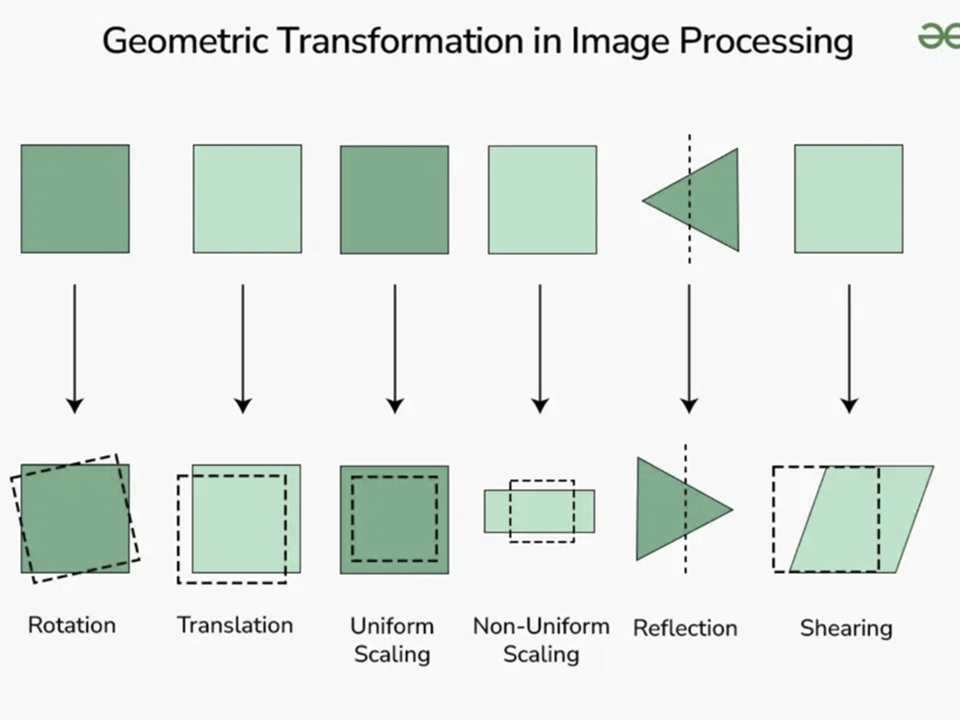

In [10]:
Image(filename=r'F:\neurotasks\interdisciplinary schools\2025-mentoring\updated contents-py\Presentation4\Slide1.PNG', width= 1000) 

In [6]:
a = np.array([[1,2,3], [4,5,6]])
b = np.array([[7,8], [9,10], [11,12]])
#c = a @ b
c = np.dot(a, b)
c

array([[ 58,  64],
       [139, 154]])

---

---

## **Nilearn library**

What is nilearn?

nilearn is a package that makes it easy to use advanced machine learning techniques to analyze data acquired with MRI machines. In particular, underlying machine learning problems include decoding brain data, computing brain parcellations, analyzing functional connectivity and connectomes, doing multi-voxel pattern analysis (MVPA) or predictive modeling.

nilearn can readily be used on task fMRI or resting-state data.






| Aspect                   | Description                                                                                                                                  |
| ------------------------ | -------------------------------------------------------------------------------------------------------------------------------------------- |
| **What is it?**          | High-level Python library for statistical analysis and visualization of neuroimaging data, mainly fMRI.                                      |
| **Purpose**              | Easy statistical analysis, machine learning, and plotting of brain images.                                                                   |
| **Supported Modalities** | Primarily fMRI and MRI                                                                                                                       |
| **Key Features**         | - GLM (general linear model) for fMRI<br>- Functional connectivity<br>- Interactive brain plotting<br>- Integration with scikit-learn for ML |
| **Typical Use Cases**    | Visualizing activation maps, decoding, resting-state analysis, plotting anatomical images                                                    |
| **Example Code**         | `from nilearn import plotting`<br>`plotting.plot_stat_map(img)`                                                                              |

---


## **What is BIDS (Brain Imaging Data Structure)?**

BIDS is one of the most important standards in neuroimaging today. It's a community-driven convention for organizing brain imaging data — to make it shareable, understandable, and reusable.

---

https://openneuro.org/datasets/ds000102/versions/00001

**BIDS (Brain Imaging Data Structure) is:**

 > A standard for how to name, organize, and describe neuroimaging datasets.

 > Compatible with many modalities: fMRI, EEG, MEG, iEEG, PET, and behavioral data.

 > Machine-readable + human-readable.

**It defines:**

> Folder structure

> File naming conventions

> Metadata in JSON sidecars and TSV files

> Required/optional fields for each modality


**File Organization for Datasets** 

Here’s what a simple BIDS dataset looks like:



**Basic principles:**

> Each subject in a sub- folder (e.g. sub-01, sub-02)
> Data separated into modality folders: anat, func, dwi, eeg...
> File names contain all metadata needed: subject, session, task, run, etc.


📝 Sidecar JSON (sub-01\_task-rest\_bold.json) contains:

* RepetitionTime
* SliceTiming
* PhaseEncodingDirection
* ...and more metadata

---

# **BIDS structure :**

> **1. root directory :**

    > dataset_description.json

    > T1w.json

    > participants.tsv

    > task-flanker_bold.json

    > derivatives
   
    > sub-...
   

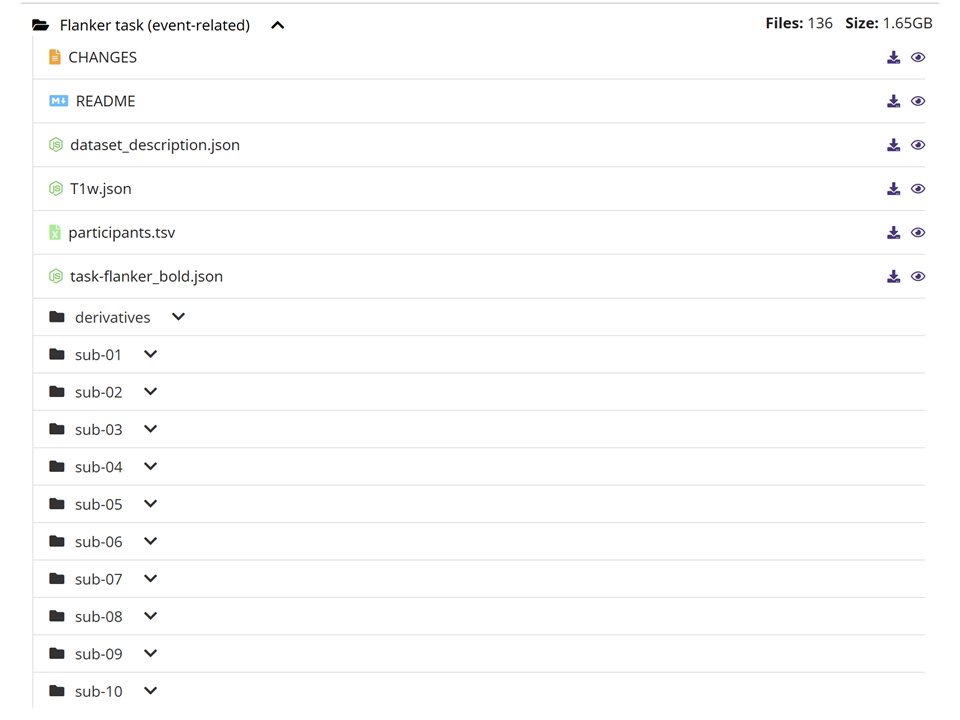

In [9]:
from IPython.display import display
from PIL import Image
img = Image.open(r"F:\neurotasks\interdisciplinary schools\2025-mentoring\teaching\Presentahjkkkkkkktion1\slide2.PNG")

#larger_img = img.resize((img.width * 2, img.height * 2))

display(img)



> **2. subject directories :**

    > sub-(group)index:
    
        > sub-01
        > sub-control01
        

> **3. modality specific folder :**

    > anat
    > func


> **4. session directories :**

    > sub-01[_ses-01][_task-name][_acq-type][_run-01][_modality].nii.gz

         > anat/sub-01_T1w.nii.gz
         > func/sub-01_task-rest_bold.nii.gz


> **5.Session Folders (for Multi-session Studies)**

     > /sub-01/

     └── ses-pre/

          └── anat/

          └── func/

     > └── ses-post/

           └── anat/

           └── func/


    > sub-01_ses-pre_task-rest_bold.nii.gz

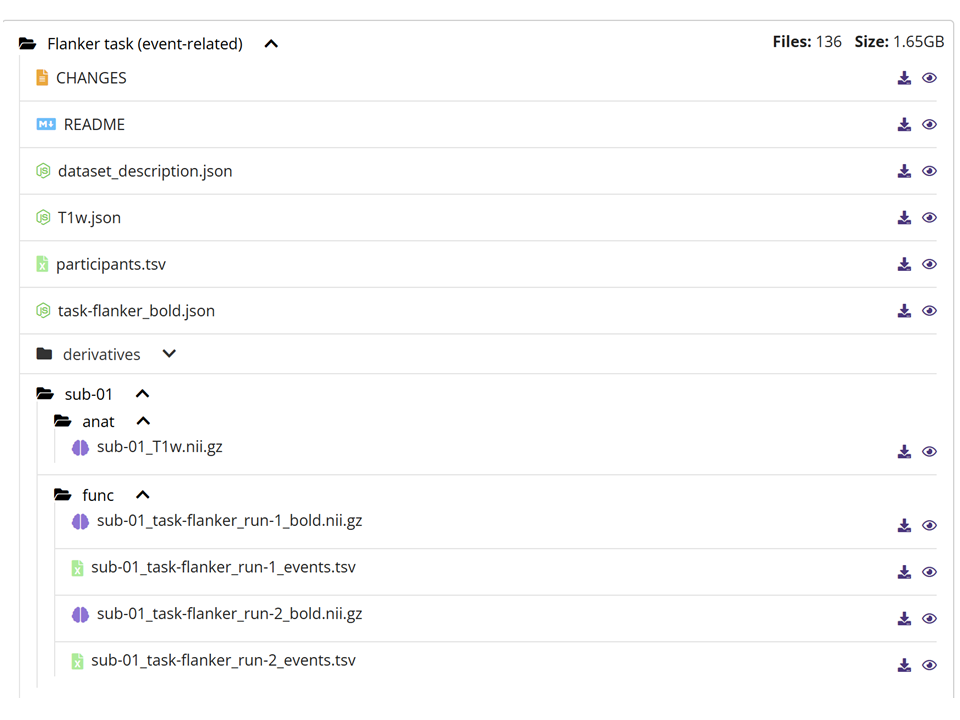

In [10]:
from IPython.display import display
from PIL import Image
img = Image.open(r"F:\neurotasks\interdisciplinary schools\2025-mentoring\teaching\Presentahjkkkkkkktion1\slide1.PNG")

#larger_img = img.resize((img.width * 2, img.height * 2))

display(img)



---


**Benefits for Collaboration and Reproducibility**

BIDS was made to solve key problems in neuroscience research:

> Without BIDS:

 - Everyone stores data in different formats
 - Hard to share or understand someone else’s dataset
 - Difficult to reproduce analysis

> With BIDS:
 - Same structure everywhere
 - Tools can automatically work on BIDS datasets (e.g. fMRIPrep, Nilearn, AFNI, SPM)
 - Clean separation between data, metadata, and derivatives
 - Makes your dataset FAIR:

  


## **Summary Table**

| Aspect            | Description                                                                   |
| ----------------- | ----------------------------------------------------------------------------- |
| What is BIDS      | A standard for organizing brain imaging datasets                              |
| Why it matters    | Makes data shareable, reusable, and compatible with modern pipelines          |
| Structure         | /sub-01/anat/sub-01\_T1w\.nii.gz, /sub-01/func/sub-01\_task-rest\_bold.nii.gz |
| Metadata          | Stored in JSON and TSV files next to NIfTI images                             |
| Benefits          | Reproducibility, collaboration, automation, pipeline compatibility            |


---


## **TASKS**

> ## **Question 1:**

> **Goal:** Practice with pandas and a little numpy on fMRI data

**Problem Statement**

* Read the file `fmri_data.json` and convert it to a DataFrame.
* Print the first 5 rows.
* Print the total number of rows and the number of unique subjects.
* Compute and print the mean signal for each Region.
* Create a pivot table that shows the mean signal for each (Subject\_ID, Condition).



> ## **YOUR ANSWER:**

* Read the file `fmri_data.json` and convert it to a DataFrame.
* Print the first 5 rows.

* Print the total number of rows and the number of unique subjects.


* Compute and print the mean signal for each Region.


* Create a pivot table that shows the mean signal for each (Subject\_ID, Condition).


---

> ## **Question 2:** 


> **Goal:** Practice filtering data and working with conditions in pandas

**Problem Statement**

* Read the dataset `fmri_data.json`.
* Select only the rows corresponding to subject **S01** and region **V1**.
* Compute the mean signal in **Rest** and **Task** conditions separately for **S01-V1**.
* Print the difference between these two values (**Task − Rest**).
* Check what percentage of the total **S01-V1** data has a signal value greater than **0.5**.



> ## **YOUR ANSWER:** 


* Read the dataset `fmri_data.json`.


* Select only the rows corresponding to subject **S01** and region **V1**.


* Compute the mean signal in **Rest** and **Task** conditions separately for **S01-V1**.


* Print the difference between these two values (**Task − Rest**).


* Check what percentage of the total **S01-V1** data has a signal value greater than **0.5**.


---

> ## **Question 3:**


> **Goal:** Practice loading data from Excel and creating a Pivot Table

**Problem Statement**

* Read the file `fmri_data.xlsx`.
* Print the total number of rows and the number of unique **Timepoints**.
* Create a Pivot Table that shows the mean signal for each **Region** and **Condition**.
* Find which (**Region**, **Condition**) has the highest mean signal, and print it.



> ## **YOUR ANSWER:**

* Read the file `fmri_data.xlsx`.


* Print the total number of rows and the number of unique **Timepoints**.


* Create a Pivot Table that shows the mean signal for each **Region** and **Condition**.


* Find which (**Region**, **Condition**) has the highest mean signal, and print it.


---

> ## **Qustion 4:**


**Goal:** Working with block fMRI data, motion filtering, and Pivot

**Problem Statement**

* Read the file `fmri_blocks_task.xlsx` (**Sheet = "blocks"**).
* Remove rows where **FD\_Mean > 0.25** (motion control).
* Compute the mean **Mean\_Signal** for each (**Subject\_ID, Region, Condition**).
* Create a Pivot Table that, for each (**Subject\_ID, Region**), shows columns **Rest** and **Task** (mean of **Mean\_Signal**).
* Add a new column called **Diff**: **Task − Rest**.
* For each **Subject\_ID**, find the region with the maximum **Diff** and print it.


> ## **YOUR ANSWER:**


* Read the file `fmri_blocks_task.xlsx` (**Sheet = "blocks"**).


* Remove rows where **FD\_Mean > 0.25** (motion control).


* Compute the mean **Mean\_Signal** for each (**Subject\_ID, Region, Condition**).


* Create a Pivot Table that, for each (**Subject\_ID, Region**), shows columns **Rest** and **Task** (mean of **Mean\_Signal**).


* Add a new column called **Diff**: **Task − Rest**.


* For each **Subject\_ID**, find the region with the maximum **Diff** and print it.

---

> ## **Question 5 :**
**Goal :** Variability & Signal-to-Motion Ratio


**Problem Statement**

* Read the file `fmri_blocks_task.xlsx`.
* For each row, create a new column called **SNR** defined as:

$$
SNR = \frac{Mean\_Signal}{Std\_Signal}
$$

* Compute the mean **SNR** for each **Region** and **Condition**.
* For each **Subject\_ID**, compute the mean **SNR** in **Task** and **Rest** conditions.
* Check how many subjects have **SNR(Task) > SNR(Rest)**.



> ## **YOUR ANSWER :**


* Read the file `fmri_blocks_task.xlsx`.


* For each row, create a new column called **SNR** defined as:

$$
SNR = \frac{Mean\_Signal}{Std\_Signal}
$$

* Compute the mean **SNR** for each **Region** and **Condition**.


* For each **Subject\_ID**, compute the mean **SNR** in **Task** and **Rest** conditions.


* Check how many subjects have **SNR(Task) > SNR(Rest)**.


---

> ## **Question 6 :**

**Goal:** Block Trends & Normalization

**Problem Statement**

* Read the file `fmri_blocks_task.xlsx`.
* Select only the data where **Region = Motor**.
* For each subject in the **Task** condition, compute the mean **Mean\_Signal** in each block (1 to 4).
* Normalize each subject’s block signals by dividing by that subject’s maximum value (so values are between 0 and 1).
* For each **Subject\_ID**, print the normalized Task signal table.



> ## **YOUR ANSWER :**


* Read the file `fmri_blocks_task.xlsx`.


* Select only the data where **Region = Motor**.


* For each subject in the **Task** condition, compute the mean **Mean\_Signal** in each block (1 to 4).


* Normalize each subject’s block signals by dividing by that subject’s maximum value (so values are between 0 and 1).


---

> ## **Question 7 :**


**Goal:** Practice comparing between runs and examining signal stability

**Problem Statement**

* Read the file `fmri_blocks_task.xlsx`.
* Group the data by (**Subject\_ID, Run, Condition**) and compute the mean **Mean\_Signal**.
* Create a Pivot Table that shows, for each **Subject\_ID** and **Condition**, the mean values for **Run-1** and **Run-2**.
* For each **Subject\_ID** and **Condition**, calculate the difference between **Run-1** and **Run-2**.
* Identify which subject has the largest **Run1 − Run2** difference in the **Task** condition.


> ## **YOUR ANSWER :**


* Read the file `fmri_blocks_task.xlsx`.


* Group the data by (**Subject\_ID, Run, Condition**) and compute the mean **Mean\_Signal**.


* Create a Pivot Table that shows, for each **Subject\_ID** and **Condition**, the mean values for **Run-1** and **Run-2**.


* For each **Subject\_ID** and **Condition**, calculate the difference between **Run-1** and **Run-2**.


* Identify which subject has the largest **Run1 − Run2** difference in the **Task** condition.


---

> ## **Question 8 :**


**Goal:** Practice working with BIDs structure.

https://openneuro.org/datasets/ds000102/versions/00001

- Select a dataset that contains only MRI/fMRI data.

- manually download them files and place them inside a project folder based on `BIDs structure`.

- upload a screenshot here:

> ## **YOUR SCREENSHOT :**